# Written description
Analysis of average fare by city type showed that average fares are higher in rural cities than suburban and urban cities. 
Even though total driver count and total rides in urban cites comprises 2/3  to 3/4 of proportions, average fares for urban cities are lower than suburban and rural cities.  

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data= "city_data.csv"
ride_data = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)
# Combine the data into a single dataset
city_ride_df = pd.merge(ride_data_df,city_data_df, how="left", on=["city", "city"])
# Display the data table for preview
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

In [3]:
city_urban = city_ride_df[city_ride_df['type']=="Urban"]
ridecount_urban = city_urban.groupby(['city']).count()["ride_id"] 
Avgurban_fare = city_urban.groupby(['city']).mean()["fare"]
driverurban_count = city_urban.groupby(['city']).mean()["driver_count"]

In [4]:
city_suburban = city_ride_df[city_ride_df['type']=="Suburban"]
ridecount_suburban = city_suburban.groupby(['city']).count()["ride_id"] 
Avgsuburban_fare = city_suburban.groupby(['city']).mean()["fare"]
driversuburban_count = city_suburban.groupby(['city']).mean()["driver_count"]

In [5]:
city_rural = city_ride_df[city_ride_df['type']=="Rural"]
ridecount_rural = city_rural.groupby(['city']).count()["ride_id"] 
Avgrural_fare = city_rural.groupby(['city']).mean()["fare"]
driverrural_count = city_rural.groupby(['city']).mean()["driver_count"]

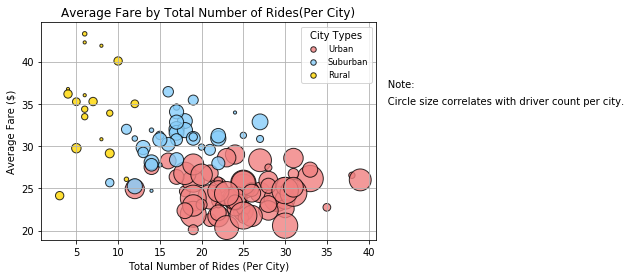

In [6]:
plt.scatter(ridecount_urban, Avgurban_fare, color = "LightCoral", alpha = .8, marker = "o", edgecolor = "black", 
                                                     linewidths = 1, s = 10*driverurban_count, label = "Urban")
plt.scatter(ridecount_suburban, Avgsuburban_fare, color = "LightSkyBlue", alpha = .8, marker = "o", edgecolor = "black", 
                                                           linewidths = 1, s = 10*driversuburban_count, label = "Suburban")
plt.scatter(ridecount_rural, Avgrural_fare, color = "Gold", alpha = .8, marker = "o", edgecolor = "black", 
                                                    linewidths = 1, s = 10*driverrural_count, label = "Rural")

plt.title("Average Fare by Total Number of Rides(Per City)") 
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

lgnd = plt.legend(fontsize="small", mode="Expanded",
                 numpoints=1, scatterpoints=1,
                 loc="best", title="City Types",
                 labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.annotate("      Note:", xy = (40,37))
plt.annotate("      Circle size correlates with driver count per city.", xy = (40,35))
plt.savefig("Pyber_images/Average Fare by City Type.png")

## Total Fares by City Type

In [7]:
# Calculate Type Percents
# Build Pie Chart
# Save Figure

In [8]:
ridetype_byfare_count= city_ride_df.groupby('type').fare.sum()
Total_fare_count = city_ride_df["fare"].sum()
Total_fare_percent = (ridetype_byfare_count / Total_fare_count) * 100

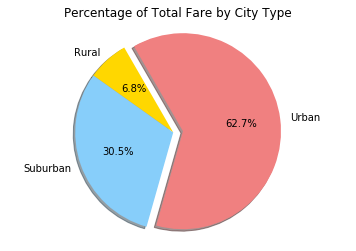

In [9]:
Cities = ["Rural", "Suburban", "Urban"]
Percent = [Total_fare_percent]
colors = ["Gold", "LightSkyBlue", "LightCoral"]
explode = (0, 0, 0.1)


plt.pie(Total_fare_percent, explode=explode, labels=Cities, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=120)


plt.axis("equal")
plt.title("Percentage of Total Fare by City Type")


plt.savefig("Pyber_images/Total_fare_percent.png")

## Total Rides by City Type

In [10]:
# Calculate Ride Percents
# Build Pie Chart
# Save Figure

In [11]:
Ride_count = city_ride_df["type"].value_counts()
Total_ride = city_ride_df["type"].count()
Total_ride_percent = (Ride_count /Total_ride ) * 100 

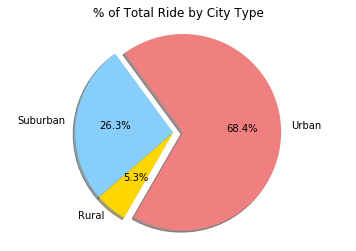

In [12]:
Cities = ["Urban", "Suburban", "Rural"]
Percent = [Total_ride_percent]
colors = ["LightCoral", "LightSkyBlue", "Gold"]
explode = (0.1, 0, 0)


plt.pie(Total_ride_percent, explode=explode, labels=Cities, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle= 240)


plt.axis("equal")
plt.title("% of Total Ride by City Type")


plt.savefig("Pyber_images/Total_ride_percent.png")

## Total Drivers by City Type

In [13]:
# Calculate Driver Percents
# Build Pie Charts
# Save Figure

In [14]:
driver_bycity_count= city_data_df.groupby('type').driver_count.sum()
driver_bycity_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [15]:
Total_driver_count = city_data_df["driver_count"].sum()
Total_driver_count

2973

In [16]:
Driver_by_city_percent = (driver_bycity_count /Total_driver_count  ) * 100

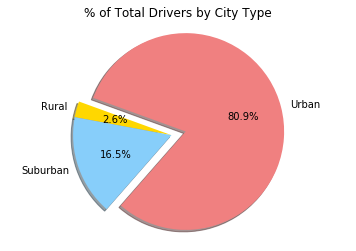

In [17]:
Cities = ["Rural", "Suburban", "Urban"]
Percent = [Driver_by_city_percent]
colors = ["Gold", "LightSkyBlue", "LightCoral"]
explode = (0, 0, 0.15) 


plt.pie(Driver_by_city_percent, explode=explode, labels=Cities, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle= 160)


plt.axis("equal")
plt.title("% of Total Drivers by City Type")


plt.savefig("Pyber_images/Driver_by_city_percent.png")